# 전체(쿼카+공작+치타+토끼+다람쥐) 데이터 분석 

* 분석 결과 요약
    * 독립변수 : sleep_score + sleep_time + yesterday_satisfaction + C(class_check)
    * 수정r제곱 : 0.363(36%)
    * 해석 : 오늘 나의 점수를 높게 시작하기 위해서는 전날 누가 업어가도 모를 정도로 충분한 시간 동안 푹 잘 자고, 본인이 만족하는 하루를 보내야한다. 다른 변수는 큰 영향이 없다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc # 폰트
#한글폰트 적용-----------------------------
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
#-----------------------------------------


from datetime import datetime
import time
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 파일이 있는 경로 지정
path = 'C:\\Users\\USER\\통계\\mini\\'

# 데이터 import

In [2]:
df = pd.read_excel(path +"today_score_data.xlsx")

# 데이터 확인

In [3]:
#데이터 모양 확인
df.head()

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
0,1,quokka,9,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,70,11772,0,0,0,2,03시대,08시대,1,0
1,2,quokka,6,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,0,5800,0,0,0,3,03시대,08시대,1,0
2,3,quokka,4,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,0,2775,0,0,0,4,05시대,10시대,1,0
3,4,quokka,7,2022-10-01,7,1,20.9,14.4,27.6,0.0,...,0,4365,0,0,0,3,05시대,07시대,1,1
4,5,quokka,7,2022-10-02,1,1,19.4,17.2,21.6,15.8,...,0,13541,0,0,1,4,03시대,10시대,1,0


In [4]:
df.describe()

,cnt,today_score,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,precipitation_check,class_check,...,sleep_score,yesterday_exercise,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_late,getup_early
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.00000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,120.50000,6.450000,4.020833,0.291667,13.929167,9.595833,19.250000,3.792500,0.208333,0.733333,...,3.004167,0.16250,8.841667,6424.80000,0.158333,0.133333,0.437500,3.083333,0.404167,0.383333
std,69.42622,1.658502,2.019669,0.455480,3.731017,3.896569,3.983439,13.905745,0.406965,0.443141,...,1.072665,0.36968,23.042800,4016.86378,0.365816,0.340645,0.497115,0.955787,0.491756,0.487214
min,1.00000,2.000000,1.000000,0.000000,4.900000,0.800000,9.800000,0.000000,0.000000,0.000000,...,1.000000,0.00000,0.000000,28.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,60.75000,5.000000,2.000000,0.000000,11.175000,6.650000,16.550000,0.000000,0.000000,0.000000,...,2.000000,0.00000,0.000000,3568.50000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,120.50000,7.000000,4.000000,0.000000,13.550000,9.550000,19.100000,0.000000,0.000000,1.000000,...,3.000000,0.00000,0.000000,5606.50000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,180.25000,8.000000,6.000000,1.000000,16.300000,11.800000,21.600000,0.000000,0.000000,1.000000,...,4.000000,0.00000,0.000000,8644.25000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000
max,240.00000,10.000000,7.000000,1.000000,21.400000,17.500000,27.700000,76.000000,1.000000,1.000000,...,5.000000,1.00000,120.000000,20086.00000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [5]:
# null 값 확인
df.isnull().sum()

cnt                        0
name                       0
today_score                0
date                       0
dayofweek                  0
dayofweek_check            0
avg_temp                   0
low_temp                   0
high_temp                  0
precipitation              0
precipitation_check        0
class_check                0
gotobed_time               0
getup_time                 0
sleep_time                 0
morning_routine            0
weather_prefer             0
sleep_score                0
yesterday_exercise         0
yesterday_exercise_time    0
yesterday_step_cnt         0
yesterday_drinking         0
period                     0
caffeine                   0
yesterday_satisfaction     0
gotobed_range              0
getup_range                0
gotobed_late               0
getup_early                0
dtype: int64

# 컬럼 정보
* name : 닉네임 (quokka(쿼카), peacock(공작), cheetah(치타), rabbit(토끼), squirrel(다람쥐))

## 종속변수

* today_score : 오늘 나의 점수 (10점 만점)

## 독립변수
*  색깔 의미 
    * 범주형 변수 : <span style="color:red"> 빨간색</span>
    *  수치형 변수 : 검정색

* date                       : 날짜 (2022-09-28 ~ 2022-11-14)
*  <span style="color:red"> dayofweek                  : 요일 (일요일 = 1 ~ 토요일 = 7) </span>
* <span style="color:red"> dayofweek_check : 주말 여부 (주말 = 1, 주말 x = 0)</span>

* <span style="color:red"> class_check                      : 수업 여부 (수업 안 하는 날 = 0, 수업 하는 날 = 1) </span>
* gotobed_time               : 취침 시간 
* <span style="color:red"> gotobed_range              : 취침 시간대  </span>
* <span style="color:red"> gotobed_late              : 늦게 취침했는지 여부 (오전 2시 이전에 취침한 경우(2시 포함X)=0, 오전 2시 이후에 취침한 경우(2시 포함o)=1)  </span>
* getup_time                 : 기상 시간 
* <span style="color:red"> getup_range              : 기상 시간대  </span>
* <span style="color:red"> getup_early              : 일찍 기상 했는지 여부 (오전 8시 이후에 기상한 경우(8시 포함O)=0, 오전 8시 이전에 기상한 경우(8시 포함X)=1  </span>
* sleep_time                 : 수면 시간 (기상시간 - 취침 시간)
* <span style="color:red"> morning_routine            : 모닝루틴 실행 여부 (모닝루틴 x = 0, 모닝루틴 o = 1) </span>
* <span style="color:red"> weather_prefer             : 날씨 선호 여부 (날씨 선호 x = 0, 날씨 선호 o = 1) </span>
* sleep_score                : 수면 점수 (5점 만점)
* <span style="color:red"> yesterday_exercise         : 전일 운동 여부 (전일 운동 x = 0, 전일 운동 o = 1) </span>
* yesterday_exercise_time    : 전일 운동 시간 (분)
* yesterday_step_cnt         : 전날 걸음 수 
* <span style="color:red"> yesterday_drinking         : 전날 음주 여부 (전날 음주 x = 0, 전일 운주 o = 1) </span>
* <span style="color:red"> period                     : 생리 여부 (생리 x = 0, 생리 o = 1) </span>
* <span style="color:red"> caffeine                   : 카페인 섭취 여부 (카페인 x = 0, 카페인 o = 1) </span>
* yesterday_satisfaction     : 전날 만족도 (5점 만점)

* avg_temp                   : 평균 기온 (℃)
* low_temp                   : 최저 기온 (℃)
* high_temp                  : 최고 기온 (℃)
* precipitation              : 강수량 (mm)
* <span style="color:red">  precipitation_check : 강수 여부 (강수 = 1, 강수 x = 0)</span>

# 데이터 타입 변경 
* 수치형 변수 -> int or float
* 범주형 변수 -> object

In [6]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      240 non-null    int64         
 1   name                     240 non-null    object        
 2   today_score              240 non-null    int64         
 3   date                     240 non-null    datetime64[ns]
 4   dayofweek                240 non-null    int64         
 5   dayofweek_check          240 non-null    int64         
 6   avg_temp                 240 non-null    float64       
 7   low_temp                 240 non-null    float64       
 8   high_temp                240 non-null    float64       
 9   precipitation            240 non-null    float64       
 10  precipitation_check      240 non-null    int64         
 11  class_check              240 non-null    int64         
 12  gotobed_time             240 non-nul

In [7]:
#범주형 변수를 object 타입으로 변경
df['dayofweek'] = df['dayofweek'].astype(object)
df['dayofweek_check'] = df['dayofweek_check'].astype(object)
df['class_check'] = df['class_check'].astype(object)
df['morning_routine'] = df['morning_routine'].astype(object)
df['weather_prefer'] = df['weather_prefer'].astype(object)
df['yesterday_exercise'] = df['yesterday_exercise'].astype(object)
df['yesterday_drinking'] = df['yesterday_drinking'].astype(object)
df['period'] = df['period'].astype(object)
df['caffeine'] = df['caffeine'].astype(object)
df['precipitation_check'] = df['precipitation_check'].astype(object)
df['gotobed_late'] = df['gotobed_late'].astype(object)
df['getup_early'] = df['getup_early'].astype(object)

In [8]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      240 non-null    int64         
 1   name                     240 non-null    object        
 2   today_score              240 non-null    int64         
 3   date                     240 non-null    datetime64[ns]
 4   dayofweek                240 non-null    object        
 5   dayofweek_check          240 non-null    object        
 6   avg_temp                 240 non-null    float64       
 7   low_temp                 240 non-null    float64       
 8   high_temp                240 non-null    float64       
 9   precipitation            240 non-null    float64       
 10  precipitation_check      240 non-null    object        
 11  class_check              240 non-null    object        
 12  gotobed_time             240 non-nul

# 데이터 분포 확인

## 전체 테이블

### 종속변수 today_score 

<AxesSubplot:xlabel='today_score', ylabel='Density'>

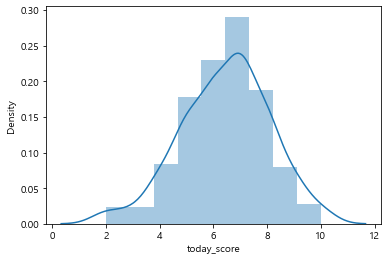

In [9]:
sns.distplot(df['today_score'])

<AxesSubplot:xlabel='today_score', ylabel='count'>

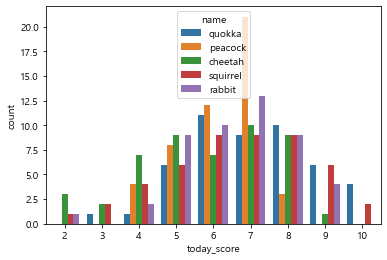

In [10]:
sns.countplot(x='today_score', hue ="name", data=df)

### 독립 변수_범주형 변수

In [11]:
# 변수 형이 obhect인 컬럼 추출
object_feature = [ col for col in df.columns if df[col].dtypes == "object"]
object_feature

['name',
 'dayofweek',
 'dayofweek_check',
 'precipitation_check',
 'class_check',
 'gotobed_time',
 'getup_time',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_range',
 'getup_range',
 'gotobed_late',
 'getup_early']

In [12]:
# name, gotbed_time, getup_time 컬럼 제외하고 리스트 생성
category_feature = list(set(object_feature) - set(['name','gotobed_time','getup_time']))
category_feature

['morning_routine',
 'class_check',
 'getup_range',
 'dayofweek',
 'yesterday_drinking',
 'gotobed_range',
 'dayofweek_check',
 'yesterday_exercise',
 'getup_early',
 'caffeine',
 'precipitation_check',
 'weather_prefer',
 'gotobed_late',
 'period']

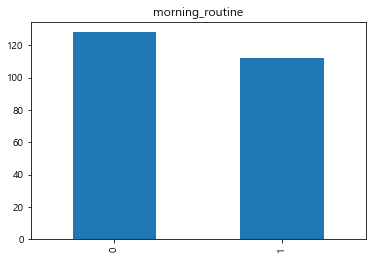

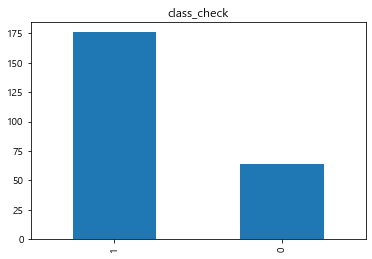

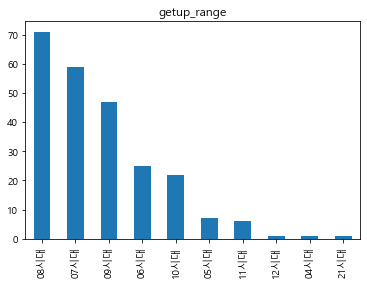

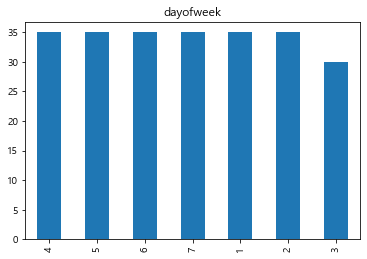

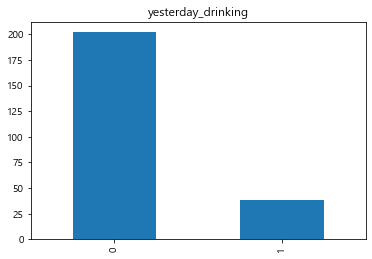

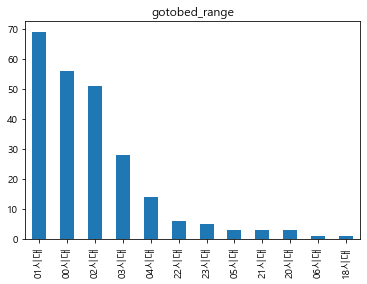

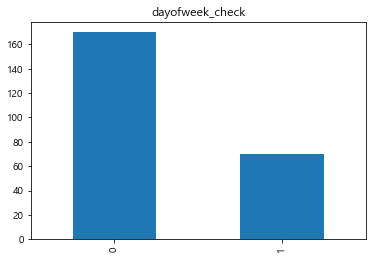

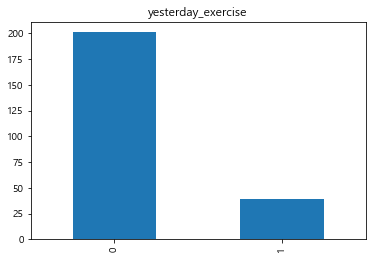

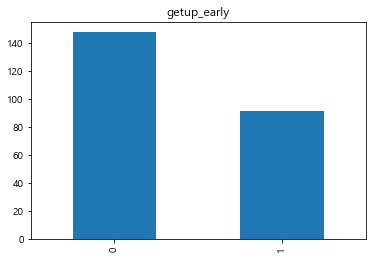

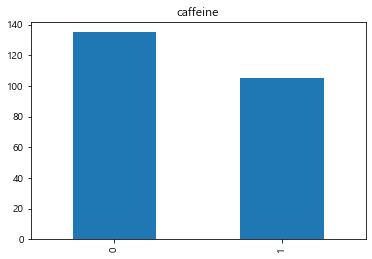

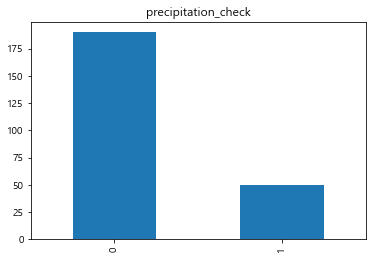

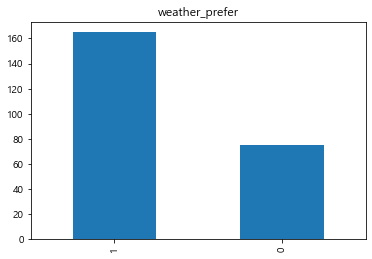

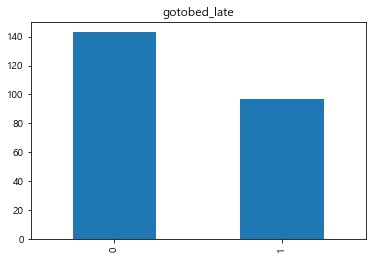

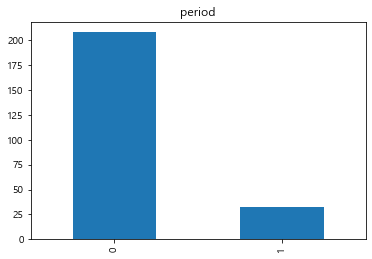

In [13]:
# 범주형 변수 분포 확인
for col in category_feature:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

* 범주형 변수 분포 해석 
    * morning_routine : 모닝루틴을 안 한 날이 한 날 보다 많다.
    * class_check : 수업을 한 날이 안 한 날보다 많다. 
    * getup_range : 기상 시간은 08시 -> 07시 -> 09시 순으로 많다. 
    * dayofweek 
    * yesterday_drinking : 어제 술을 안 마신 날이 마신 날보다 많다.
    * gotobed_range : 취침시간은 01시 -> 00시 -> 02시 순으로 많다.
    * dayofweek_check 
    * yesterday_exercise : 어제 운동을 안 한 날이 한 날 보다 많다. 
    * getup_early : 오전 8시 이후(8시 포함)에 기상한 경우가 더 많다.
    * caffeine : 카페인을 섭취하지 않은 날이 섭취한 날 보다 많다.
    * precipitation_check : 비가 안 온 날이 비 온 날 보다 많다.
    * weather_prefer : 오늘 날씨가 맘에 든 날이 맘에 들지 않은 날 보다 많다. 
    * gotobed_late : 오전 2시 이전(2시 포함x)에 취침한 경우가 더 많다. 
    * period

### 독립 변수_수치형 변수 

In [14]:
# 전체 변수중 object변수 제외, today_score,cnt, date도 제외
numerical_feature = list(set(df.columns) - set(object_feature) - set(['cnt','date','today_score']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

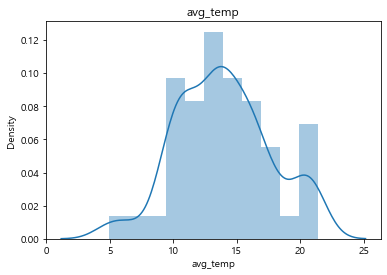

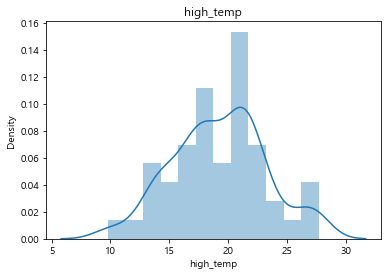

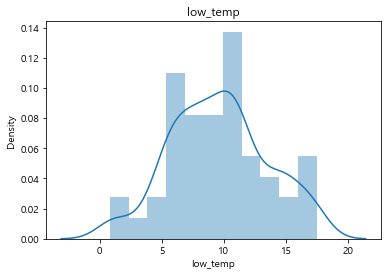

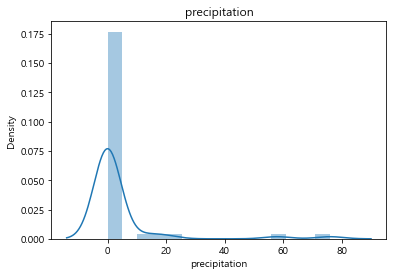

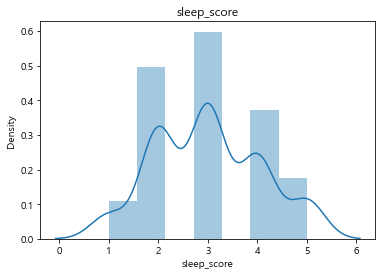

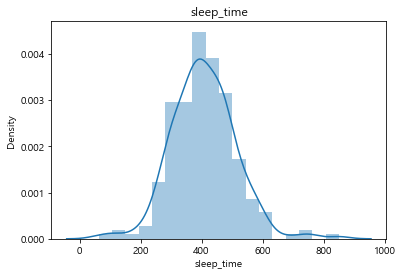

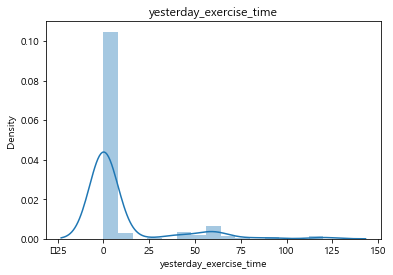

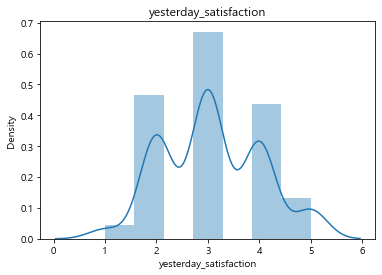

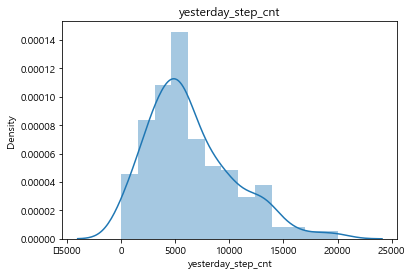

In [15]:
# 수치형 변수 분포 확인
for col in numerical_feature:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

# 상관분석 

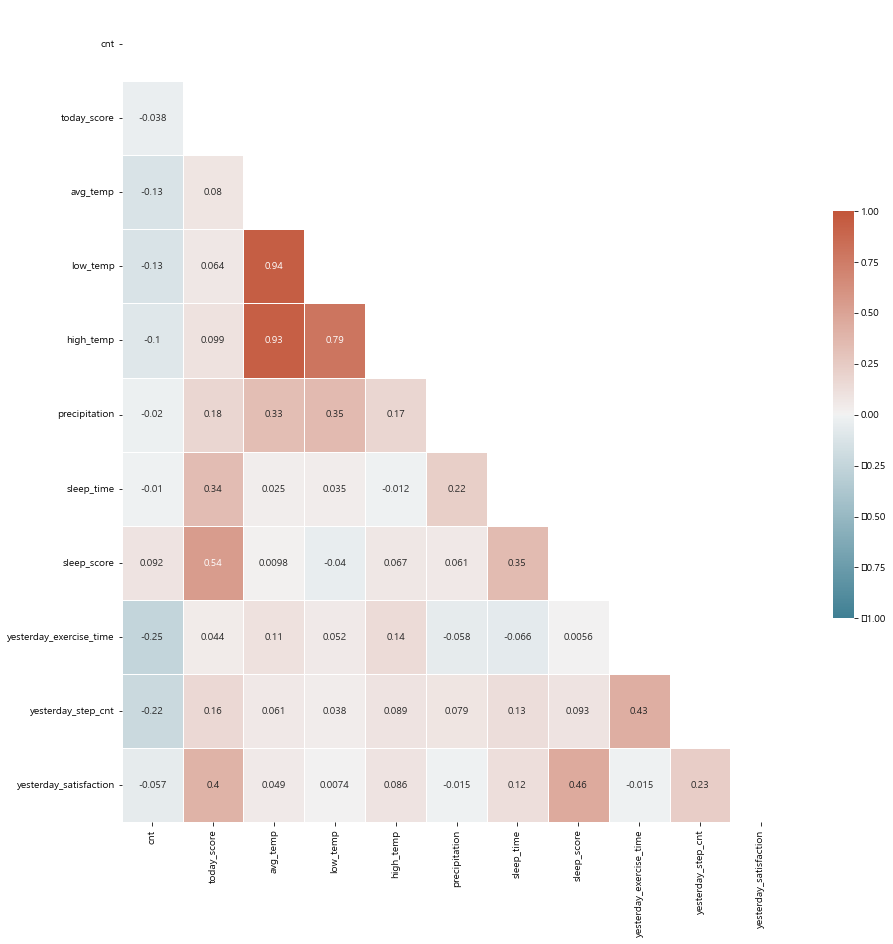

In [16]:
tmp = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(tmp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# 히트맵 팔레트 색상 불러오기
cmap = sns.diverging_palette(220, 20, as_cmap=True)


# 히트맵을 그린다
sns.heatmap(tmp , 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            cmap = cmap,
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


* 상관 분석 해석 
    * 오늘 나의 점수(today_score)와는 sleep_time(수면시간), sleep_score(수면 점수), yesterday_satisfaction(전날 만족도)가 상관관계가 있다. 
    * 평균기온(avg_temp)과 최고기온(high_temp), 최저기온(low_temp)은 강한 상관관계가 있다. 다중공선성도 높게 나올 것 같아서, 다중회귀에 넣을 때 체크해봐야겠다.
    * sleep_score(수면 점수)와 yesterday_satisfaction(전날 만족도)가 상관관계가 있다. 
    * sleep_score(수면 점수)와 sleep_time(수면시간)이 상관관계가 있다. 
    * yesterday_step_cnt(전날 걸음수)와 yesterday_exercise_time(전날 운동시간)이 상관관계가 있다. 

# 왜도 확인
- 왜도가 -2~2사이에 있으면 정규분포를 만족한다고 본다. 
- 정규분포를 만족하지 않는 값은 log를 씌우는 것을 고려해보자.

In [17]:
df.skew()

cnt                        0.000000
today_score               -0.297222
dayofweek                 -0.028646
dayofweek_check            0.922474
avg_temp                   0.093974
low_temp                   0.065016
high_temp                  0.015958
precipitation              4.231705
precipitation_check        1.445419
class_check               -1.061938
sleep_time                 0.355849
morning_routine            0.134473
weather_prefer            -0.814137
sleep_score                0.176270
yesterday_exercise         1.841248
yesterday_exercise_time    2.795109
yesterday_step_cnt         0.883241
yesterday_drinking         1.883666
period                     2.170869
caffeine                   0.253564
yesterday_satisfaction     0.180137
gotobed_late               0.393035
getup_early                0.482937
dtype: float64

* 결과 : 범주형 변수를 제외하고 precipitation, yesterday_exercise_time

# 단일 선형 회귀

## 범주형 변수

In [18]:
#범주형 변수 출력
category_feature

['morning_routine',
 'class_check',
 'getup_range',
 'dayofweek',
 'yesterday_drinking',
 'gotobed_range',
 'dayofweek_check',
 'yesterday_exercise',
 'getup_early',
 'caffeine',
 'precipitation_check',
 'weather_prefer',
 'gotobed_late',
 'period']

* 🎉의미 : p-value가 0.05미만으로 유의미함, 귀무가설 기각

### 🎉 dayofweek : 요일 (일요일 = 1 ~ 토요일 = 7)
* 수정r제곱 기준 설명력 : 0.04(4%)
* 해석1(p-value 0.05기준) : 일요일과 화요일의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 화요일이 일요일보다 1.3점 낮음
* 해석2(p-value 0.06기준) : 일요일과 월요일의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 월요일이 일요일보다 0.7점 낮음

In [19]:
test = ols('today_score ~ C(dayofweek)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.857
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0105
Time:                        23:17:59   Log-Likelihood:                -452.94
No. Observations:                 240   AIC:                             919.9
Df Residuals:                     233   BIC:                             944.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.9143      0.27

### 🎉 dayofweek_check : 주말 여부 (주말 = 1 , 주말 x = 0)
* 가설 : 주말이 평일보다 오늘의 점수가 높을 것이다.
<br><br/>
* 수정r제곱 기준 설명력 : 0.02(2%)
* 해석: 주말과 평일의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 평일이 주말보다 0.6점 높음
* 분석가 의견 : 주말에 관계 없이 프로젝트가 이어지는 일정이어서 주말 여부가 큰 영향이 없던 걸로 보인다.

In [20]:
test = ols('today_score ~ C(dayofweek_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.472
Date:                Sun, 20 Nov 2022   Prob (F-statistic):            0.00674
Time:                        23:20:23   Log-Likelihood:                -457.75
No. Observations:                 240   AIC:                             919.5
Df Residuals:                     238   BIC:                             926.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

###  precipitation_check : 강수 여부 (강수 = 1 , 강수 x = 0)
* 가설 : 비 안 오는 날이 비오는 날보다 오늘의 점수가 높을 것이다.
<br> <br/>
* 해석 : 비오는 날과 비 안오는 날이 차이가 없다는 귀무가설 채택
* 분석가 의견 : 비 오는 날이 몇일 없었고, 온 날 도 오늘 나의 점수를 매기는 아침에 왔는지 알 수 없기 때문에 차이가 없는 결과가 도출된 것 같다. 

In [21]:
test = ols('today_score ~ C(precipitation_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02058
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.886
Time:                        23:23:53   Log-Likelihood:                -461.45
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### 🎉 class : 수업 여부 (수업 안 하는 날 = 0, 수업 하는 날 = 1)
* 가설 : 수업을 안 하는 날이 하는 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 수정r제곱 기준 설명력 : 0.03(3%)
* 해석 : 수업 하는 날과 수업 안하는 날의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 수업 하는 날이 수업 안 하는 날보다 0.7점 낮음

In [19]:
test = ols('today_score ~ C(class_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.817
Date:                Sat, 19 Nov 2022   Prob (F-statistic):            0.00329
Time:                        00:46:04   Log-Likelihood:                -457.10
No. Observations:                 240   AIC:                             918.2
Df Residuals:                     238   BIC:                             925.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.9688      0.204  

### morning_routine : 모닝루틴 실행 여부 (모닝루틴 x = 0, 모닝루틴 o = 1)
* 가설 : 모닝루틴을 한 날이 안 하는 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 해석: 모닝루틴을 한 날과 안하는 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택
* 분석가 의견 : 모닝루틴을 안 한 날이 더 많았기 때문에, 안 한 날이 계속 이어지게 되면서 하든 안하든 무뎌졌기 때문에 이런 결과가 나온 것 같다. 

In [22]:
test = ols('today_score ~ C(morning_routine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.862
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0920
Time:                        23:29:17   Log-Likelihood:                -460.03
No. Observations:                 240   AIC:                             924.1
Df Residuals:                     238   BIC:                             931.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### yesterday_exercise : 전일 운동 여부 (전일 운동 x = 0, 전일 운동 o = 1)
* 가설 : 전일 운동을 안 한 날이 한 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 해석: 전일 운동을 한 날과 안한 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택
* 분석가 의견 : 전일 운동을 안 한 날이 더 많았기 때문에, 안 한 날이 계속 이어지게 되면서 하든 안하든 무뎌졌기 때문에 이런 결과가 나온 것 같다.

In [23]:
test = ols('today_score ~ C(yesterday_exercise)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.002245
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.962
Time:                        23:29:28   Log-Likelihood:                -461.46
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### 🎉yesterday_drinking : 전날 음주 여부 (전날 음주 x = 0, 전날 음주 o = 1)
* 가설 : 전날 음주를 안 한 날이 한 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 수정r제곱 기준 설명력 : 0.01(1%)
* 해석(p-value 0.06기준) : 전날 음주를 한 날과 전날 음주 안한 날의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 전날 음주 하는 날이 전날 음주 안 하는 것 보다 0.5점 높음

In [24]:
test = ols('today_score ~ C(yesterday_drinking)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.683
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0562
Time:                        23:30:20   Log-Likelihood:                -459.62
No. Observations:                 240   AIC:                             923.2
Df Residuals:                     238   BIC:                             930.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### period : 생리 여부 (생리 x = 0, 생리 o = 1)
* 가설 : 생리를 안하는 날이 하는 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 해석: 생리를 안하는 날과 하는 날이 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [25]:
test = ols('today_score ~ C(weather_prefer)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01097
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.917
Time:                        23:32:37   Log-Likelihood:                -461.46
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

### caffeine : 카페인 섭취 여부 (카페인 x = 0, 카페인 o = 1)
* 가설 : 카페인을 섭취 한 날이 안 한 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 해석: 카페인을 섭취 한 날과 안 한 날이 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [23]:
test = ols('today_score ~ C(caffeine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.669
Date:                Sat, 19 Nov 2022   Prob (F-statistic):              0.104
Time:                        01:19:15   Log-Likelihood:                -460.13
No. Observations:                 240   AIC:                             924.3
Df Residuals:                     238   BIC:                             931.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.2963      0.142  

### 🎉gotobed_range : 취침 시간대
* 수정r제곱 기준 설명력 : 0.06(6%)
<br><br/>
* 해석1 : 00시에 취침할 때와 18시에 취침할 때의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 18시에 취침할 때가 00시에 취침할 때 보다 4.4점 낮음
* 분석가 의견 : 18시에 취침 했을 때가 1번 있었는데, 다람쥐님이 이 때 18시에 취침해서 21시에 기상했기 때문에 오늘 나의 점수가 낮게 나와서 결과가 이렇게 나왔다.
<br><br/>
* 해석2 : 00시에 취침할 때와 20시에 취침할 때의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 20시에 취침할 때가 00시에 취침할 때 보다 2.2점 높음 
* 분석가 의견 : 20시에 취침 했을 때는 3번 있었는데, 치타, 토끼, 다람쥐님 모두 일찍 잠자리에 들어 푹 잘 잤기에 오늘 나의 점수를 높게 줘서 결과가 이렇게 나왔다.

In [38]:
test = ols('today_score ~ C(gotobed_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.394
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00795
Time:                        00:07:47   Log-Likelihood:                -448.35
No. Observations:                 240   AIC:                             920.7
Df Residuals:                     228   BIC:                             962.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### gotobed_late: 늦게 취침했는지 여부 
(오전 2시 이전에 취침한 경우(2시 포함X)=0, 오전 2시 이후에 취침한 경우(2시 포함o)=1)
<br><br/>
* 가설 : 늦게 취침할 수록 오늘 나의 점수가 낮을 것이다.
* 해석 : 늦게 취침 한 날과 늦게 취침하지 않은 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [39]:
test = ols('today_score ~ C(gotobed_late)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.007
Date:                Mon, 21 Nov 2022   Prob (F-statistic):              0.317
Time:                        00:07:55   Log-Likelihood:                -460.96
No. Observations:                 240   AIC:                             925.9
Df Residuals:                     238   BIC:                             932.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5385 

### 🎉getup_range              : 기상 시간대
* 수정r제곱 기준 설명력 : 0.05(5%)
<br><br/>
* 해석1 : 04시에 기상할 때와 21시에 기상할 때의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 21시에 기상할 때가 04시에 기상할 때 보다 7점 낮음
* 분석가 의견 : 21시에 기상 했을 때가 1번 있었는데, 다람쥐님이 이 때 18시에 취침해서 21시에 기상했기 때문에 오늘 나의 점수가 낮게 나와서 결과가 이렇게 나왔다.

In [40]:
test = ols('today_score ~ C(getup_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.505
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00943
Time:                        00:10:05   Log-Likelihood:                -450.24
No. Observations:                 240   AIC:                             920.5
Df Residuals:                     230   BIC:                             955.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9

### getup_early              : 일찍 기상 했는지 여부 
(오전 8시 이후에 기상한 경우(8시 포함O)=0, 오전 8시 이전에 기상한 경우(8시 포함X)=1 
<br><br/>
* 가설 : 일찍 기상할 수록 오늘 나의 점수가 낮을 것이다.
* 해석 : 일찍 기상 한 날과 일찍 기상하지 않은 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [41]:
test = ols('today_score ~ C(getup_early)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.948
Date:                Mon, 21 Nov 2022   Prob (F-statistic):              0.164
Time:                        00:12:47   Log-Likelihood:                -460.49
No. Observations:                 240   AIC:                             925.0
Df Residuals:                     238   BIC:                             931.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5676    

## 수치형 변수

In [26]:
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

* 🎉의미 : p-value가 0.05미만으로 유의미함, 귀무가설 기각

### avg_temp : 평균 기온 (℃)
* 해석 : 평균 기온에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [27]:
test = ols('today_score ~ avg_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.537
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.216
Time:                        23:34:10   Log-Likelihood:                -460.69
No. Observations:                 240   AIC:                             925.4
Df Residuals:                     238   BIC:                             932.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9541      0.414     14.378      0.0

### low_temp : 최저 기온 (℃)
* 해석 : 최저 기온에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [28]:
test = ols('today_score ~ low_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9670
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.326
Time:                        23:36:41   Log-Likelihood:                -460.98
No. Observations:                 240   AIC:                             926.0
Df Residuals:                     238   BIC:                             932.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1902      0.285     21.714      0.0

### high_temp : 최고 기온 (℃)
* 해석 : 최고 기온에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [29]:
test = ols('today_score ~ high_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.334
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.128
Time:                        23:37:15   Log-Likelihood:                -460.29
No. Observations:                 240   AIC:                             924.6
Df Residuals:                     238   BIC:                             931.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6602      0.528     10.722      0.0

### 🎉precipitation : 강수량 (mm)
* 가설 : 비가 많이 올 수록 오늘의 점수가 낮을 것이다.
<br><br/>
* 수정r제곱 기준 설명력 : 0.01(1%)
* 해석 : 강수량에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 비가 많이 올 수록 오늘의 점수가 높다?!!
* 분석가 의견 : 비 오는 날이 몇일 없었고, 온 날 도 오늘 나의 점수를 매기는 아침에 왔는지 알 수 없기 때문에 가설에 맞지 않은 결과가 나온 것 아닐까???

In [31]:
#8 왜도 확인 결과 -2~2 범위에 벗어나서 log를 씌움
test = ols('today_score ~  np.log1p(precipitation)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.213
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0412
Time:                        23:38:46   Log-Likelihood:                -459.36
No. Observations:                 240   AIC:                             922.7
Df Residuals:                     238   BIC:                             929.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 🎉🎉sleep_time : 수면 시간 (기상시간 - 취침 시간)
* 가설 : 수면 시간이 많을 수록 오늘 나의 점수가 높다. 
<br><br/>
* 수정r제곱 기준 설명력 : 0.11(11%)
* 해석 : 수면 시간에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 1분 더 잘 수록 0.0054점 증가

In [32]:
test = ols('today_score ~ sleep_time', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     30.92
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           7.21e-08
Time:                        23:41:16   Log-Likelihood:                -446.81
No. Observations:                 240   AIC:                             897.6
Df Residuals:                     238   BIC:                             904.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2698      0.405     10.545      0.0

### 🎉🎉sleep_score : 수면 점수 (5점 만점)
* 가설 : 수면 점수가 높을 수록 오늘 나의 점수가 높다. 
<br><br/>
* 수정r제곱 기준 설명력 : 0.29(29%)
* 해석 : 수면 점수에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 1점 더 높을 수록 0.8384점 증가

In [33]:
test = ols('today_score ~ sleep_score', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     99.12
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           9.58e-20
Time:                        23:41:23   Log-Likelihood:                -419.68
No. Observations:                 240   AIC:                             843.4
Df Residuals:                     238   BIC:                             850.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9314      0.269     14.639      

### yesterday_exercise_time : 전일 운동 시간 (분)
* 가설 : 전일 운동시간이 많을 수록 오늘 나의 점수가 높다. 
<br><br/>
* 해석 : 전일 운동 시간에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [34]:
#8 왜도 확인 결과 -2~2 범위에 벗어나서 log를 씌움
test = ols('today_score ~ np.log1p(yesterday_exercise_time)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.05744
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.811
Time:                        23:41:31   Log-Likelihood:                -461.43
No. Observations:                 240   AIC:                             926.9
Df Residuals:                     238   BIC:                             933.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### 🎉yesterday_step_cnt : 전날 걸음 수
* 가설 : 전날 걸음 수가 많을 수록 오늘 나의 점수가 낮다. 
<br><br/>
* 수정r제곱 기준 설명력 : 0.02(2%)
* 해석 : 전날 걸음 수에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 1걸음 더 걸을 수로 높을 수록 0.00006504점 증가

In [35]:
test = ols('today_score ~ yesterday_step_cnt', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.056
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0146
Time:                        23:42:19   Log-Likelihood:                -458.45
No. Observations:                 240   AIC:                             920.9
Df Residuals:                     238   BIC:                             927.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.0321      0

### 🎉🎉yesterday_satisfaction : 전날 만족도 (5점 만점)
* 가설 : 전날 만족도가 높을 수록 오늘 나의 점수가 높다. 
<br><br/>
* 수정r제곱 기준 설명력 : 0.15(15%)
* 해석 : 전날 만족도에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 1점 더 높을 수로 높을 수록 0.69점 증가

In [36]:
test = ols('today_score ~ yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     44.95
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.46e-10
Time:                        23:42:50   Log-Likelihood:                -440.70
No. Observations:                 240   AIC:                             885.4
Df Residuals:                     238   BIC:                             892.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

# 다중 공선성 확인
* 다중 공선성은 독립변수들간의 상관정도가 높은 상태를 의미
* 다중 공선성을 고려하지 않고 회귀분석을 수행한 후 결과를 해석하면 변수의 중요성을 설명할 때 잘못된 결론을 내릴 수 있다. 
* vif(분산팽창계수)방식을 사용하여 팽창계수가 15이상인 것을 골라내려고 한다.

In [43]:
vif_scaled_test_df = df[['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # 여기에 다중공선성 볼 테이블을 넣어주세요
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
0,921.531491,avg_temp
1,435.574241,high_temp
2,136.085503,low_temp
7,14.847813,yesterday_satisfaction
5,14.834856,sleep_time
4,13.277637,sleep_score
8,5.000785,yesterday_step_cnt
3,1.619712,precipitation
6,1.535179,yesterday_exercise_time


* 결과 : avg_temp, high_temp, low_temp 중에 1개 변수만 사용하기

# 다중 회귀 분석
* 조건 1 : 다중 공선성 확인 결과 avg_temp, high_temp, low_temp 중에 1개 변수만 사용하기
* 조건 2 : 파생 변수와 원래 변수 중에 1개만 사용 하기 
    * (1) dayofweek, dayofweek_check
    * (2) precipitation, precipitation_check
    * (3) getup_range, getup_early
    * (4) gotobed_range, gotobed_late

## 유의미한 변수만 진행
* 독립변수 : C(dayofweek_check)+C(class_check)+C(yesterday_drinking)+C(gotobed_range)+C(getup_early)+np.log1p(precipitation)+sleep_time+sleep_score+yesterday_step_cnt+yesterday_satisfaction

In [50]:
test = ols('today_score ~ C(dayofweek_check)+C(class_check)+C(yesterday_drinking)+C(gotobed_range)+C(getup_early)+np.log1p(precipitation)+sleep_time+sleep_score+yesterday_step_cnt+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     7.554
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           3.72e-16
Time:                        00:41:57   Log-Likelihood:                -398.51
No. Observations:                 240   AIC:                             839.0
Df Residuals:                     219   BIC:                             912.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## 최종 다중 회귀식
* 독립변수 : sleep_score + sleep_time + yesterday_satisfaction + C(class_check)
* 수정r제곱 : 0.363(36%)
* 해석 : 오늘 나의 점수를 높게 시작하기 위해서는 전날 누가 업어가도 모를 정도로 충분한 시간 동안 푹 잘 자고, 본인이 만족하는 하루를 보내야한다. 다른 변수는 큰 영향이 없다.

In [86]:
# 독립변수 : sleep_score + sleep_time + yesterday_satisfaction + C(class_check)
# 수정r제곱 : 0.363
test = ols('today_score ~  sleep_score + sleep_time + yesterday_satisfaction + C(class_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     34.98
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.49e-23
Time:                        01:08:05   Log-Likelihood:                -405.40
No. Observations:                 240   AIC:                             820.8
Df Residuals:                     235   BIC:                             838.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3